## Bibliotecas

In [1]:
# Esta biblioteca foi importada para corrigir um warning ao usar a função KMeans()
import os
os.environ["OMP_NUM_THREADS"] = '1'

import yfinance as yf
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from scipy.stats import zscore
import matplotlib.pyplot as plt
import sklearn as sk 
import pingouin as pg
import plotly.graph_objects as go
import numpy as np
from adjustText import adjust_text
pd.set_option('display.max_columns', None) # Para vizualizar todas as colunas do Dataframe

# Base de Dados

## Dicionário da Base de Dados

In [2]:
tickers_nomes = {
    # Índices de Mercado
    '^FTW5000': 'Wilshire 5000',
    '^GSPC': 'S&P 500',
    '^DJI': 'Dow Jones Industrial Average',
    '^IXIC': 'NASDAQ Composite',
    '^RUT': 'Russell 2000',
    
    # Índices Setores
    '^NDX' : 'U.S. Tecnology',
    '^SP500-40': 'U.S. Financials',
    '^SP500-35': 'U.S. Healthcare',
    '^SP500-25': 'U.S. Consumer Services',
    '^SP500-50': 'U.S. Telecommunications',
    '^SP500-20': 'U.S. Industrials',
    '^SP500-30': 'U.S. Consumer Goods',
    '^SP500-15': 'U.S. Basic Materials',
    '^SP500-60': 'U.S. Real Estate',
    '^SP500-55': 'U.S. Utilities',
    '^SP500-1010': 'U.S. Energy',

    # Corporate Bonds
    'AGG': 'Core U.S. Aggregate Bond',
    'LQD': 'Investment Grade Corporate Bond',
    'HYG': 'High Yield Corporate Bond',
    
    # Treasures
    'DX-Y.NYB': 'U.S. Dólar Index',
    'SHV': 'Short Term Treasury Bond',
    'SHY': '1-3 Year Treasury Bond',
    'IEF': '7-10 Year Treasury Bond',
    'TIP': 'TIPS Bond',
    
    # Commodities
    'GC=F': 'Gold',
    'BZ=F': 'Brent Oil',
    'SI=F': 'Silver',
    'BZ=F': 'Brent Oil',
    'CL=F': 'Crude Oil',
    'ZC=F': 'Corn',
    'ZS=F': 'Soybean',
    'HG=F': 'Copper',
    'ZW=F': 'Wheat'
}


## Extração de Dados com Yahoo Finance

In [3]:
indices = list(tickers_nomes.keys())
i_data = pd.DataFrame()

for i in indices:
    i_data[i] = yf.download(i, period = 'max', progress=False)['Adj Close']

In [4]:
i_data = i_data.resample('M').mean()
i_data = i_data.loc['2009-12-31':] #data deinício do ticker mais recente
i_data

,^FTW5000,^GSPC,^DJI,^IXIC,^RUT,^NDX,^SP500-40,^SP500-35,^SP500-25,^SP500-50,^SP500-20,^SP500-30,^SP500-15,^SP500-60,^SP500-55,^SP500-1010,AGG,LQD,HYG,DX-Y.NYB,SHV,SHY,IEF,TIP,GC=F,BZ=F,SI=F,CL=F,ZC=F,ZS=F,HG=F,ZW=F
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2009-12-31,11441.162287,1110.377724,10433.442694,2220.599998,611.227728,1816.540910,193.615909,362.710908,233.279546,113.968636,244.869999,276.969091,198.210908,93.012273,158.163636,428.732275,71.213496,62.928133,37.902911,76.790000,95.712965,71.074580,67.246029,72.836126,1128.977284,75.209090,17.609455,74.603183,395.500000,1032.284091,3.187727,532.761364
2010-01-31,11660.525905,1123.581582,10471.235300,2267.774722,631.756309,1850.219470,199.071578,370.201056,235.069473,109.060526,250.225790,275.111579,200.548420,92.027894,155.636841,437.721053,71.193612,63.131186,38.608094,77.840526,95.726679,71.084493,66.870061,73.107213,1116.826300,77.008421,17.713000,78.402632,385.868421,976.947368,3.337658,522.118421
2010-02-28,11327.021536,1089.159989,10214.506271,2194.440006,613.876841,1784.734735,191.552105,362.139475,233.440000,103.415790,245.452103,275.106314,188.717896,89.923684,148.163156,418.243158,71.492958,62.858166,37.697945,80.155789,95.741201,71.294306,67.370023,72.935319,1098.189479,74.909999,15.899895,76.452632,362.776316,938.013158,3.119184,488.789474
2010-03-31,12049.730384,1152.048690,10677.518767,2362.243896,672.932604,1920.616078,209.265652,371.409132,253.686521,106.561305,265.429999,285.249999,201.412608,100.338261,150.973478,429.527825,71.909200,64.047967,39.094079,80.671304,95.735559,71.242308,67.485376,72.666141,1114.356525,79.931304,17.120261,81.290000,363.597826,949.684783,3.395413,479.500000
2010-04-30,12568.394252,1197.316185,11052.147647,2475.720017,715.748099,2010.960013,222.194762,366.930478,271.860477,108.049048,282.000480,287.435715,209.048572,107.223810,153.478095,449.290953,71.883654,64.353924,39.629561,81.232857,95.722757,71.218105,67.275734,73.287994,1151.452375,85.753810,18.152428,84.575237,354.023810,973.333333,3.519190,476.702381
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-02-29,50440.005078,5011.961426,38720.517969,15808.935010,2005.293005,17764.316113,655.894992,1685.735504,1441.337006,271.649004,996.887500,783.810510,532.234508,240.267500,309.677000,644.793506,96.609919,106.520142,75.552004,104.105501,108.467541,80.720121,93.277867,104.918054,2025.214990,81.623999,22.661200,76.610000,423.375000,1169.387500,3.796625,585.812500
2024-03-31,52021.131445,5170.572485,39105.519922,16216.295508,2070.131482,18138.193359,681.930493,1701.381012,1463.920502,277.559999,1040.554993,803.202002,569.624496,244.975500,321.956496,687.851498,96.778360,107.133316,76.289232,103.624001,108.897121,80.877612,93.592430,105.568365,2161.869995,84.665499,24.529550,80.405000,429.500000,1179.287500,3.976425,541.962500
2024-04-30,51400.460405,5112.492742,38401.217330,15950.863548,2014.109553,17776.503285,679.119546,1644.020447,1435.614097,286.516363,1042.101366,795.854545,569.572277,231.215910,331.827723,734.136824,95.315536,105.083093,75.745235,105.411819,109.341000,80.729936,91.695787,104.648766,2332.590898,88.999999,27.495682,84.394091,434.625000,1164.613636,4.360909,564.886364


## Cálculo do retorno e da volatilidade

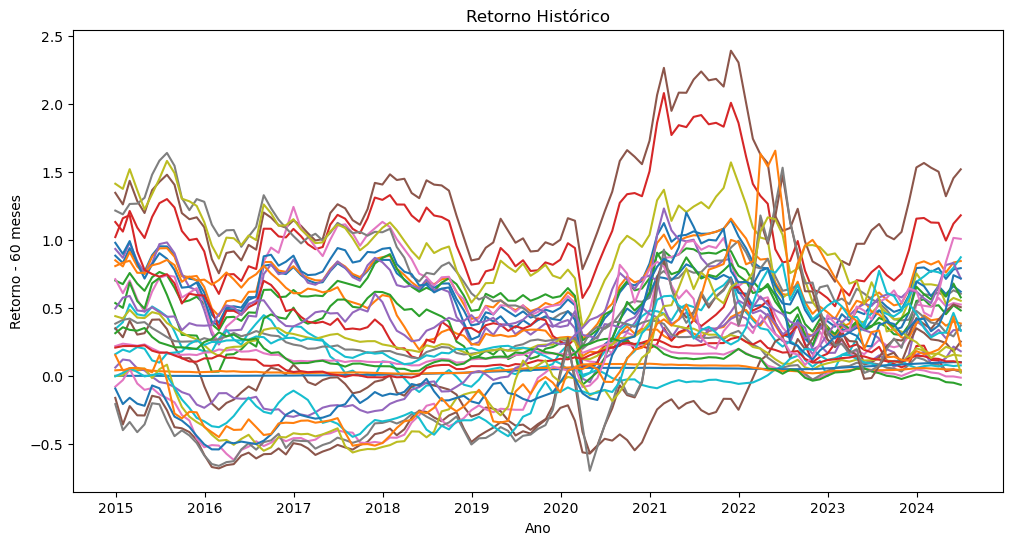

In [5]:
retorno = i_data.pct_change(periods=60).dropna(how='all') # Cálculo do retorno anual

plt.figure(figsize=(12,6))

plt.plot(retorno)
plt.title('Retorno Histórico')
plt.xlabel('Ano')
plt.ylabel('Retorno - 60 meses');

In [6]:
ri_data = pd.DataFrame()

ri_data['Retornos'] = ((retorno+1).prod()**(1/(len(retorno)*6))-1)*100 # Cálculo do retorno composto (média geométrica)
ri_data['Volatilidade'] = ((i_data.pct_change(periods=60)).std()/np.sqrt(5))*100 #Anualizando a volatilidade
ri_data['Índice'] = list(tickers_nomes.values()) 
ri_data = ri_data[['Índice','Retornos','Volatilidade']]

ri_data.sort_values(by='Volatilidade')

,Índice,Retornos,Volatilidade
SHY,1-3 Year Treasury Bond,0.756771,0.993752
SHV,Short Term Treasury Bond,0.622226,1.335903
AGG,Core U.S. Aggregate Bond,2.002227,3.068039
TIP,TIPS Bond,2.002027,3.468819
HYG,High Yield Corporate Bond,3.573930,4.438070
IEF,7-10 Year Treasury Bond,2.065697,4.520626
DX-Y.NYB,U.S. Dólar Index,1.867749,4.614706
LQD,Investment Grade Corporate Bond,3.282935,4.791398
^SP500-55,U.S. Utilities,5.438098,4.802817
^DJI,Dow Jones Industrial Average,7.994954,7.546801


## Plotagem da Base de Dados

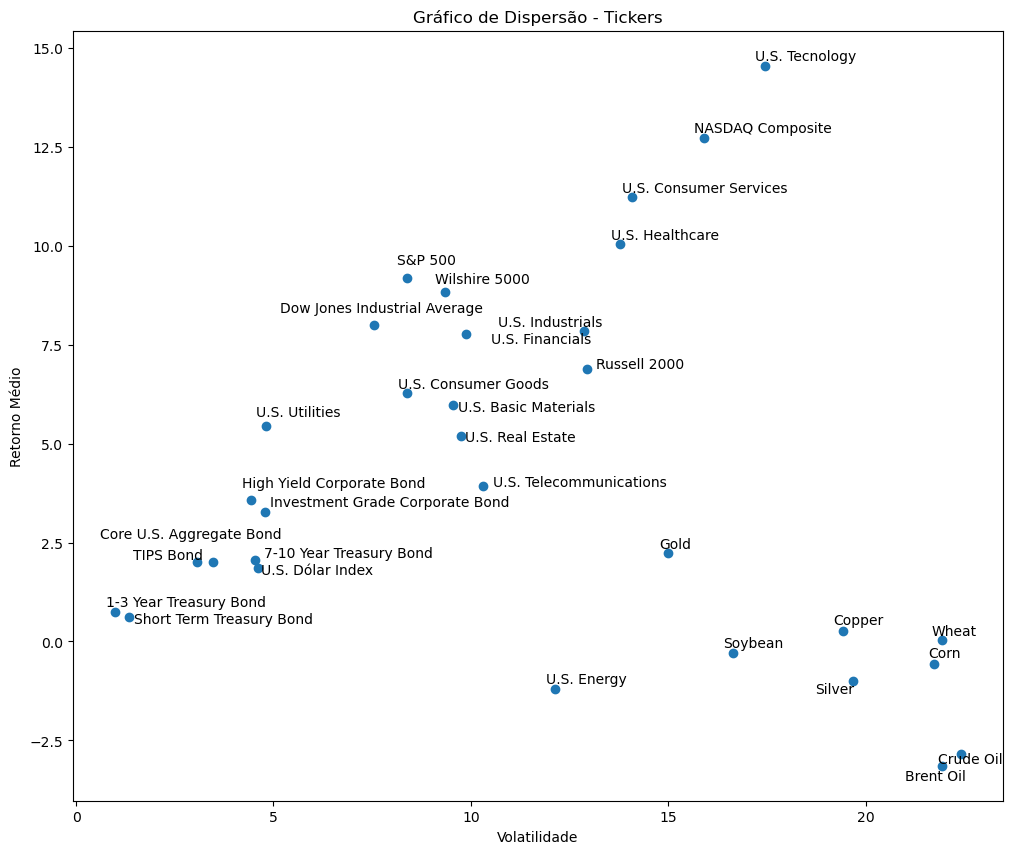

In [7]:
plt.figure(figsize=(12,10))

plt.scatter(ri_data.iloc[:,2], ri_data.iloc[:,1])

texts = [] 
for i, txt in enumerate(ri_data['Índice']):
    texts.append(plt.text(ri_data.iloc[i, 2], ri_data.iloc[i, 1], txt, ha='center'))

plt.xlabel('Volatilidade')
plt.ylabel('Retorno Médio')
plt.title('Gráfico de Dispersão - Tickers')
adjust_text(texts)

## Descrição da Base de Dados

In [8]:
ri_data[['Retornos','Volatilidade']].describe()

,Retornos,Volatilidade
count,32.000000,32.000000
mean,4.172252,11.345972
std,4.585203,6.513282
min,-3.138853,0.993752
25%,0.534996,4.799962
50%,3.428433,10.091340
75%,7.782579,16.081497
max,14.546275,22.410732


## Matriz de Correlação

<Axes: >

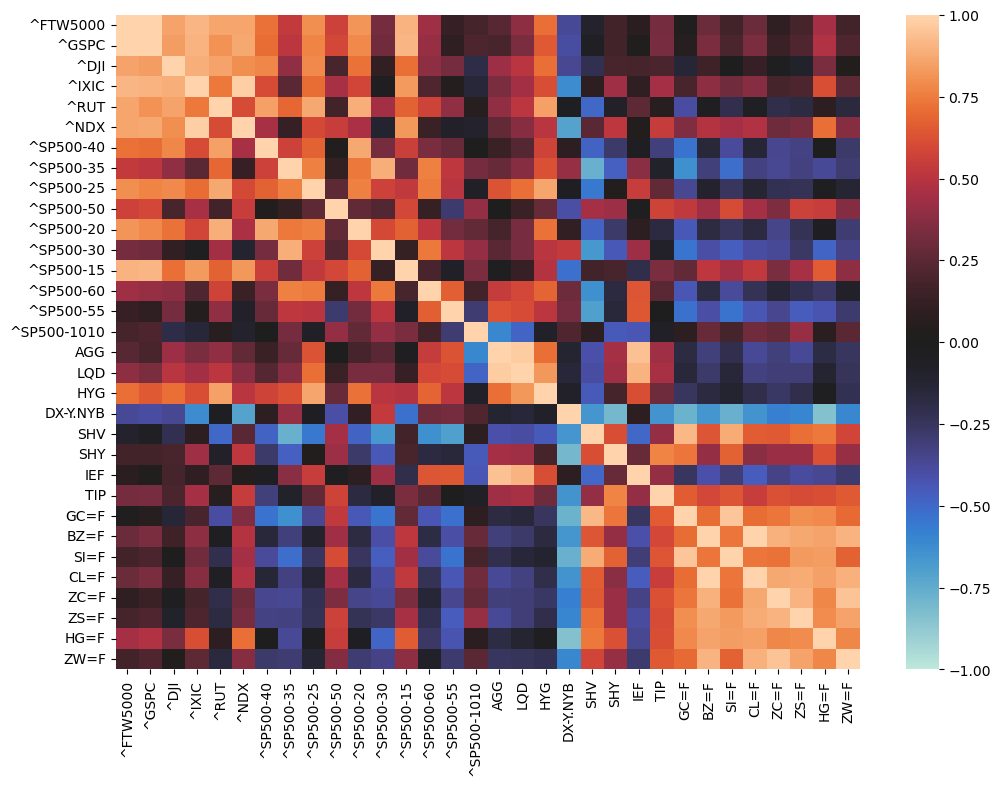

In [9]:
import seaborn as sns

corr = retorno.corr()

plt.figure(figsize=(12, 8.5))
sns.heatmap(corr, center=0, vmin=-1, vmax=1)

In [10]:
# Maiores correlações positivas

corr_stack = corr.stack()
corr_positivo = corr_stack[(corr_stack>0) & (corr_stack != 1)].drop_duplicates()

corr_positivo.nlargest(20)

BZ=F       CL=F         0.993960
^FTW5000   ^GSPC        0.993127
^IXIC      ^NDX         0.976906
AGG        LQD          0.974593
GC=F       SI=F         0.960689
ZC=F       ZW=F         0.947618
AGG        IEF          0.937893
SHV        GC=F         0.919916
^GSPC      ^SP500-15    0.910750
^FTW5000   ^IXIC        0.907160
BZ=F       ZW=F         0.905747
^GSPC      ^IXIC        0.902672
^FTW5000   ^SP500-15    0.902232
ZC=F       ZS=F         0.899578
LQD        IEF          0.898854
BZ=F       ZC=F         0.891924
CL=F       ZW=F         0.891894
^SP500-35  ^SP500-30    0.889234
^RUT       ^SP500-20    0.888269
^DJI       ^IXIC        0.887019
dtype: float64

In [11]:
# Maiores correlações negativas

corr_stack = corr.stack()
corr_positivo = corr_stack[(corr_stack<0)].drop_duplicates()

corr_positivo.nsmallest(20)

DX-Y.NYB     HG=F       -0.843541
             SHY        -0.798865
             GC=F       -0.777195
             SI=F       -0.771750
^SP500-35    SHV        -0.768002
^NDX         DX-Y.NYB   -0.718479
^SP500-55    SHV        -0.695654
^SP500-30    SHV        -0.666542
DX-Y.NYB     BZ=F       -0.663703
             SHV        -0.663423
             TIP        -0.652055
             CL=F       -0.651031
^SP500-60    SHV        -0.636519
^SP500-35    GC=F       -0.635735
^IXIC        DX-Y.NYB   -0.623384
DX-Y.NYB     ZW=F       -0.605594
^SP500-1010  AGG        -0.604497
DX-Y.NYB     ZS=F       -0.595702
             ZC=F       -0.572874
^SP500-25    SHV        -0.553546
dtype: float64

# Clusterização


## Método Hierárquico

Text(0, 0.5, 'Distância Euclidiana')

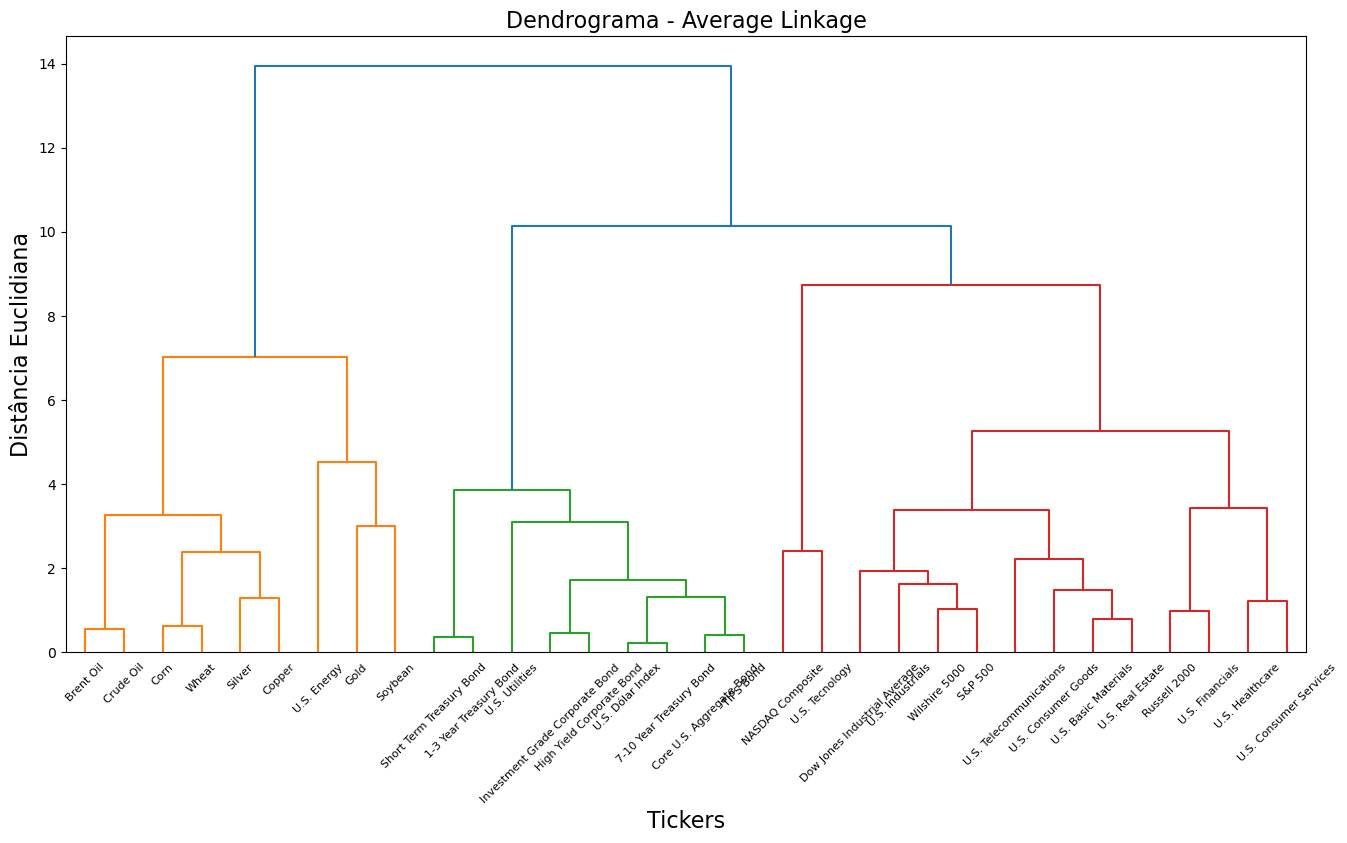

In [12]:
import scipy.cluster.hierarchy as sch

plt.figure(figsize=(16,8))

h_linkage = sch.linkage(ri_data[['Retornos','Volatilidade']], method = 'average', metric = 'euclidean')
dendrogram = sch.dendrogram(h_linkage, labels = list(tickers_nomes.values()))

plt.title('Dendrograma - Average Linkage', fontsize=16)
plt.xlabel('Tickers', fontsize=16)
plt.ylabel('Distância Euclidiana', fontsize=16)

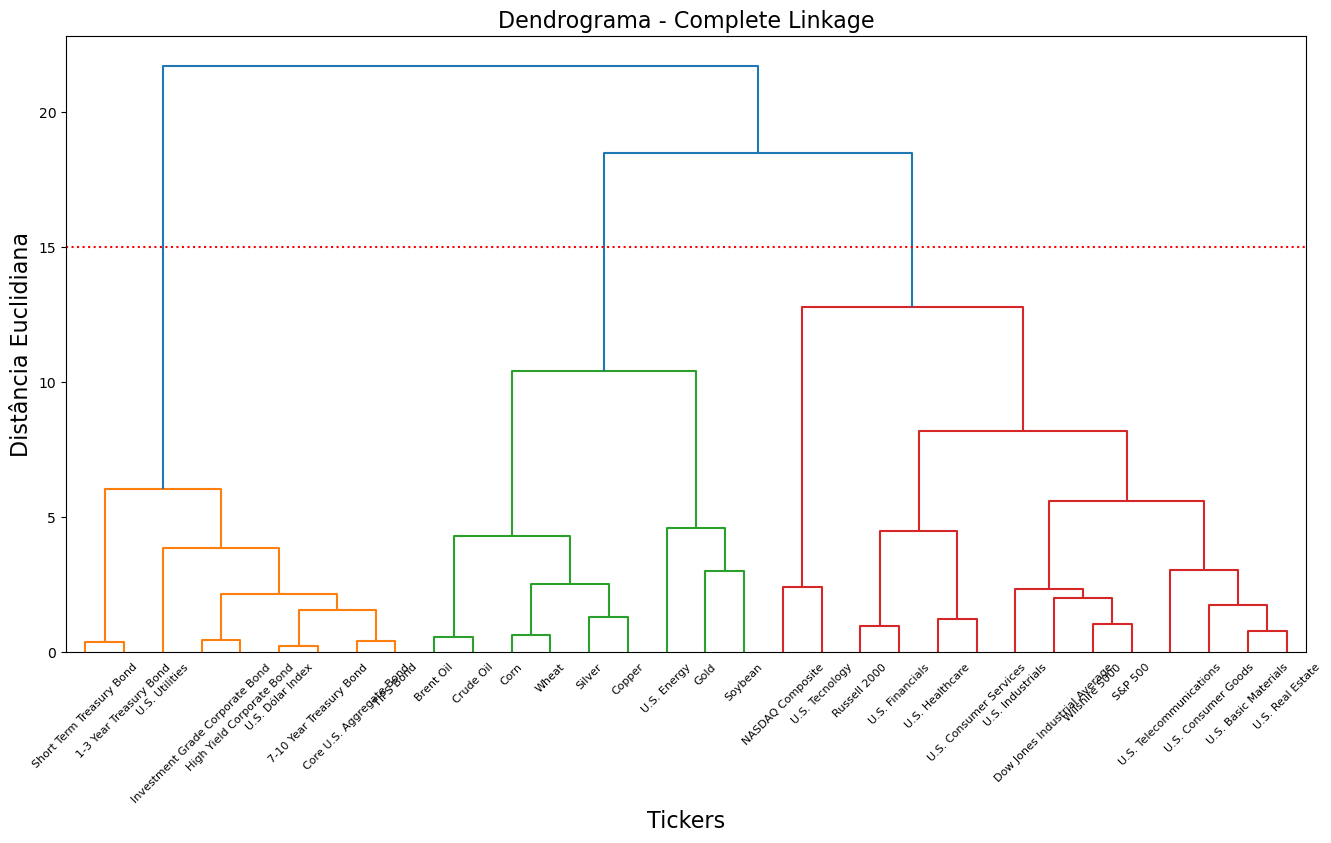

In [13]:
import scipy.cluster.hierarchy as sch

plt.figure(figsize=(16,8))

h_linkage = sch.linkage(ri_data[['Retornos','Volatilidade']], method = 'complete', metric = 'euclidean')
dendrogram = sch.dendrogram(h_linkage, labels = list(tickers_nomes.values()))

plt.title('Dendrograma - Complete Linkage', fontsize=16)
plt.xlabel('Tickers', fontsize=16)
plt.ylabel('Distância Euclidiana', fontsize=16)
plt.axhline(y = 15, linestyle = 'dotted', color = 'red');

Text(0, 0.5, 'Distância Euclidiana')

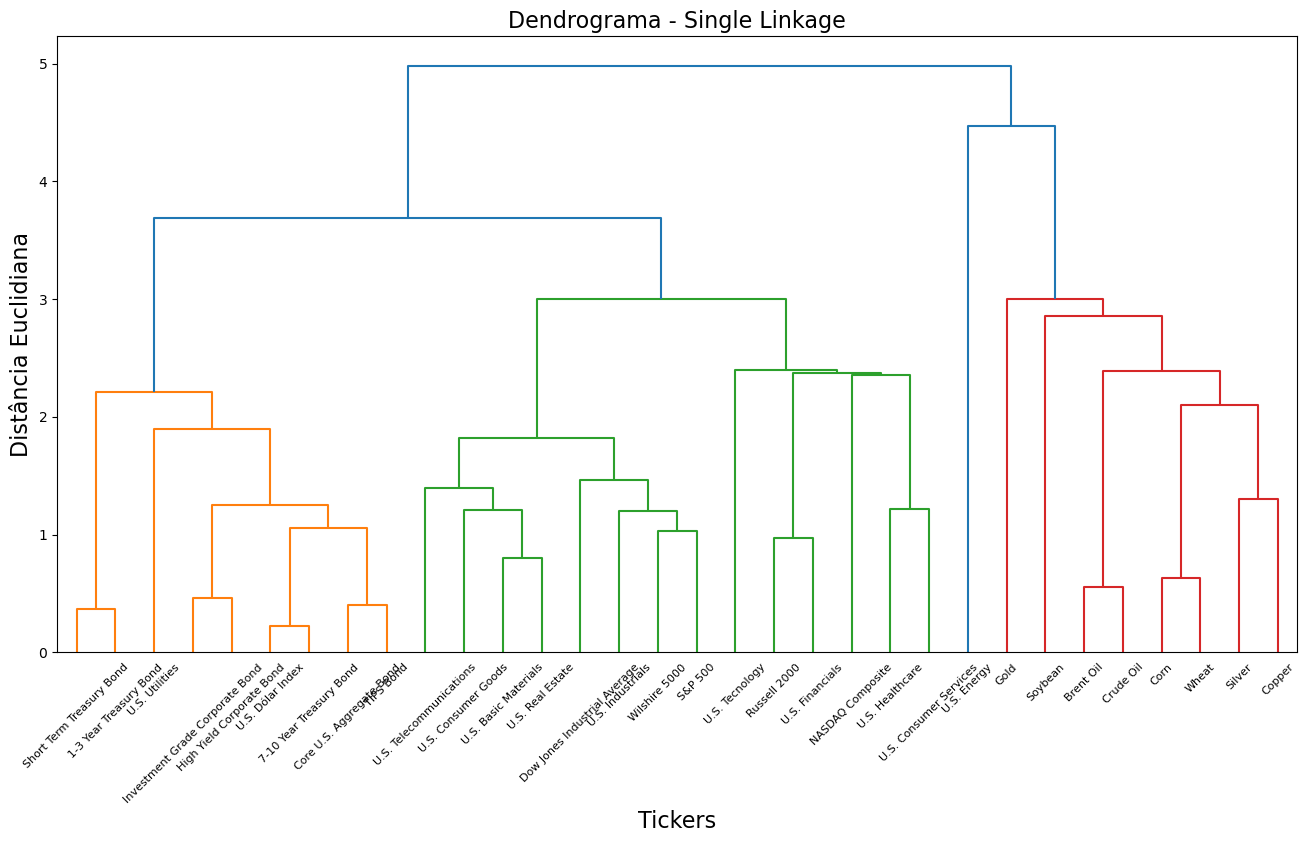

In [14]:
import scipy.cluster.hierarchy as sch

plt.figure(figsize=(16,8))

h_linkage = sch.linkage(ri_data[['Retornos','Volatilidade']], method = 'single', metric = 'euclidean')
dendrogram = sch.dendrogram(h_linkage, labels = list(tickers_nomes.values()))

plt.title('Dendrograma - Single Linkage', fontsize=16)
plt.xlabel('Tickers', fontsize=16)
plt.ylabel('Distância Euclidiana', fontsize=16)

## Não-Hierárquico: K-Means

### Método de Elbow

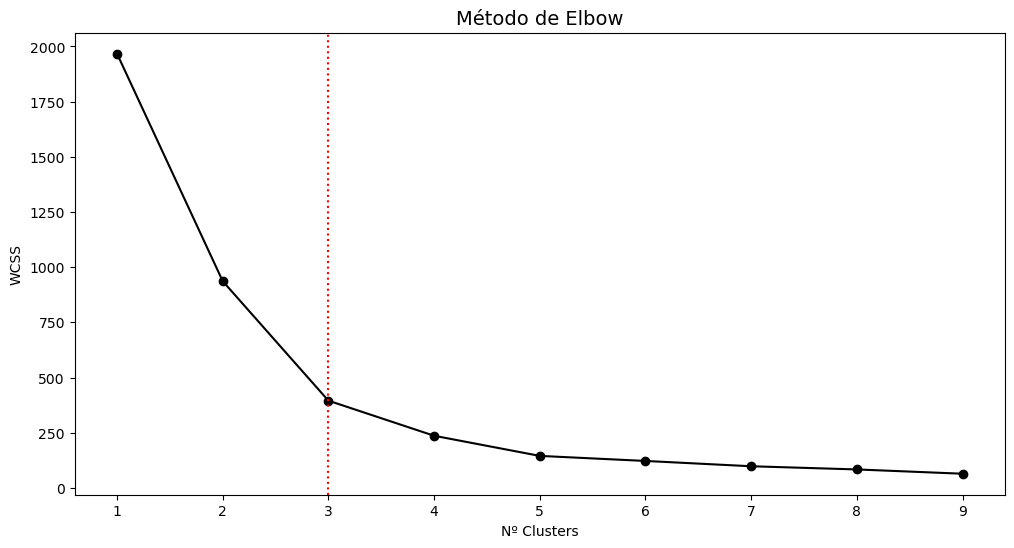

In [15]:
elbow = []

K = range(1,10) 

for k in K:
    KmeanElbow = sk.cluster.KMeans(n_clusters=k, init='random', n_init='auto', random_state=1000).fit(ri_data[['Retornos','Volatilidade']])
    elbow.append(KmeanElbow.inertia_)
    
plt.figure(figsize=(12,6))
plt.plot(K, elbow, marker='o', color = 'black')
plt.xlabel('Nº Clusters')
plt.ylabel('WCSS')
plt.title('Método de Elbow', fontsize = 14)
plt.axvline(x = 3, linestyle = 'dotted', color = 'red') 

### Método da Silhueta

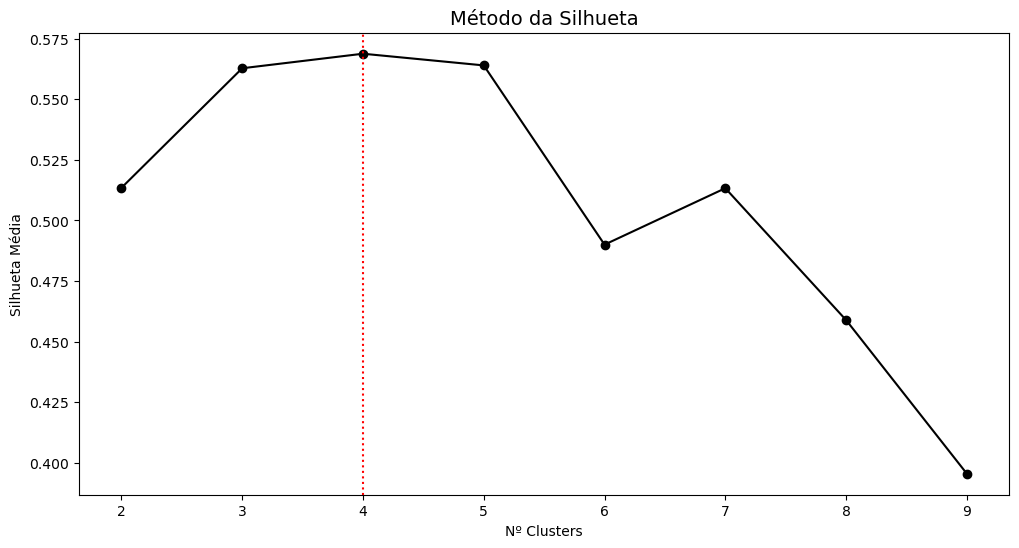

In [16]:
silhueta = []
I = range(2,10) 
for i in I: 
    KmeansSil = sk.cluster.KMeans(n_clusters=i, init='random', n_init='auto', random_state=100).fit(ri_data[['Retornos','Volatilidade']])
    silhueta.append(sk.metrics.silhouette_score(ri_data[['Retornos','Volatilidade']], KmeansSil.labels_))

plt.figure(figsize=(12,6))
plt.plot(range(2, 10), silhueta, color = 'black', marker='o')
plt.xlabel('Nº Clusters')
plt.ylabel('Silhueta Média')
plt.title('Método da Silhueta', fontsize = 14)
plt.axvline(x = silhueta.index(max(silhueta))+2, linestyle = 'dotted', color = 'red') 

### Atribuição dos Clusters

In [17]:
kmeans_final = KMeans(n_clusters = 4, init = 'random', n_init='auto', random_state=100).fit(ri_data[['Retornos','Volatilidade']])

kmeans_clusters = kmeans_final.labels_
ri_data['cluster_kmeans'] = kmeans_clusters
ri_data['cluster_kmeans'] = ri_data['cluster_kmeans'].astype('category')

ri_data.sort_values(by='cluster_kmeans')

,Índice,Retornos,Volatilidade,cluster_kmeans
^IXIC,NASDAQ Composite,12.716005,15.898851,0
^NDX,U.S. Tecnology,14.546275,17.452652,0
^SP500-35,U.S. Healthcare,10.036628,13.777937,0
^SP500-25,U.S. Consumer Services,11.219126,14.077295,0
^FTW5000,Wilshire 5000,8.839891,9.351042,1
^SP500-60,U.S. Real Estate,5.201085,9.760359,1
^SP500-30,U.S. Consumer Goods,6.282660,8.393483,1
^SP500-20,U.S. Industrials,7.761578,9.867498,1
^SP500-50,U.S. Telecommunications,3.923816,10.315182,1
^SP500-15,U.S. Basic Materials,5.972011,9.557741,1


## Análise de Variância (ANOVA)

In [18]:
print('Anova: Retornos')

print(pg.anova(dv='Retornos', 
         between='cluster_kmeans', 
         data=ri_data[['Retornos','Volatilidade','cluster_kmeans']],
         detailed=False))

print('\n\nAnova: Volatilidade')

print(pg.anova(dv='Volatilidade', 
         between='cluster_kmeans', 
         data=ri_data[['Retornos','Volatilidade', 'cluster_kmeans']],
         detailed=False))

Anova: Retornos
           Source  ddof1  ddof2          F         p-unc       np2
0  cluster_kmeans      3     28  71.477196  3.076622e-13  0.884503


Anova: Volatilidade
           Source  ddof1  ddof2          F         p-unc       np2
0  cluster_kmeans      3     28  66.965655  6.851809e-13  0.877674


# Resultados Finais

## Método Não-Hierárquico: K-Means

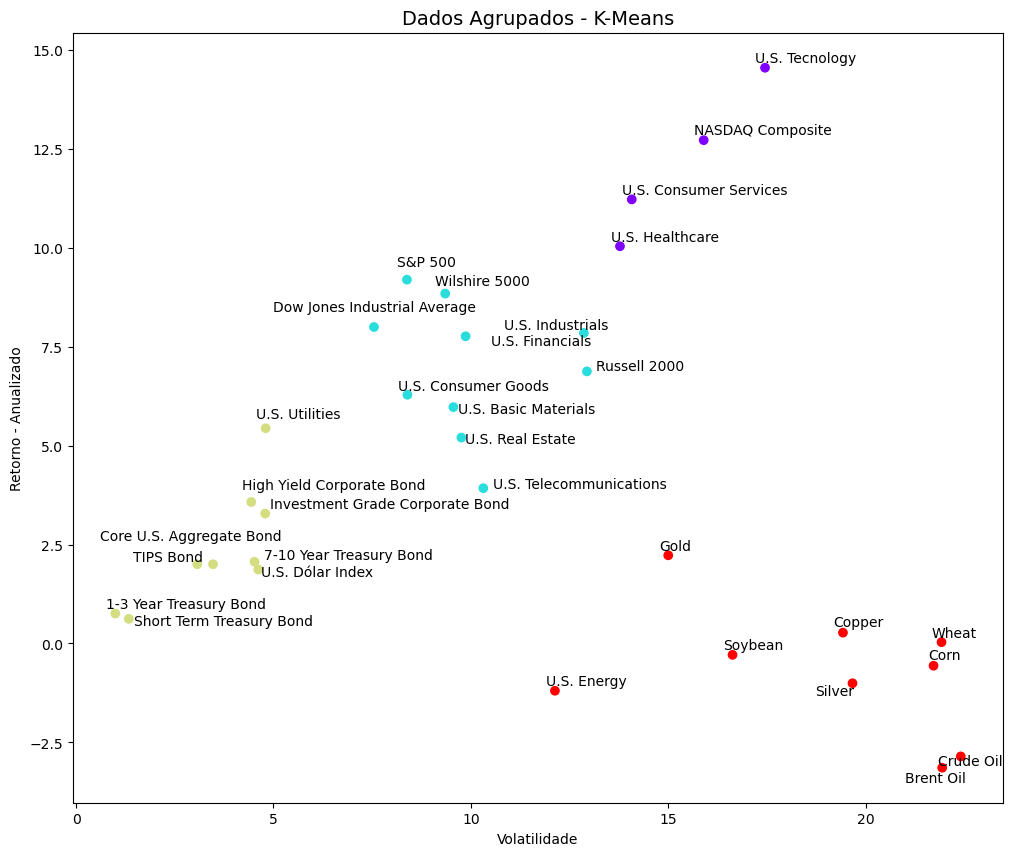

In [19]:
plt.figure(figsize=(12,10))

plt.scatter(ri_data.iloc[:,2], ri_data.iloc[:,1], c = kmeans_clusters, cmap ="rainbow")

texts = [] 
for i, txt in enumerate(ri_data['Índice']):
    texts.append(plt.text(ri_data.iloc[i, 2], ri_data.iloc[i, 1], txt, ha='center'))   
    
plt.xlabel('Volatilidade')
plt.ylabel('Retorno - Anualizado')
plt.title('Dados Agrupados - K-Means', fontsize=14)
adjust_text(texts)

## Método Hierárquico: Complete Linkage

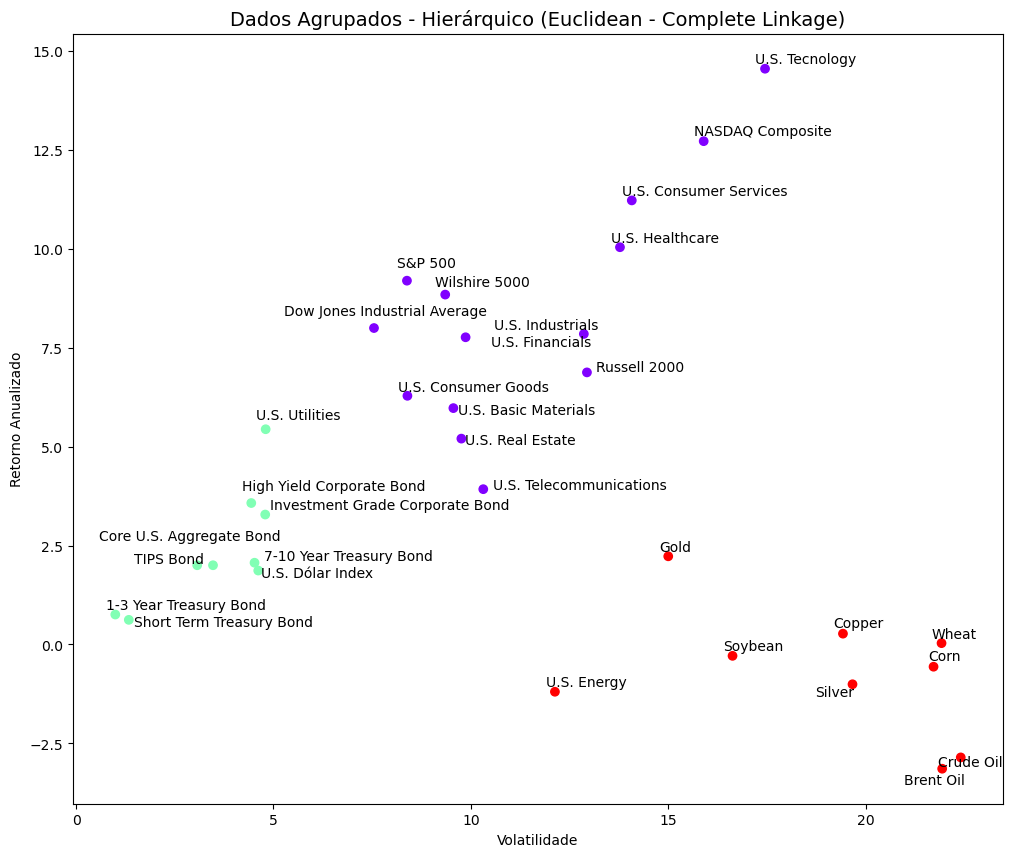

In [20]:
agg_complete = AgglomerativeClustering(n_clusters = 3, metric = 'euclidean', linkage = 'complete')
agg_cluster = agg_complete.fit_predict(ri_data[['Retornos', 'Volatilidade']])
ri_data['cluster_agg'] = agg_cluster
ri_data['cluster_agg'] = ri_data['cluster_agg'].astype('category')

plt.figure(figsize=(12,10))

plt.scatter(ri_data.iloc[:,2], ri_data.iloc[:,1], c = agg_cluster, cmap ="rainbow")

texts = [] 
for i, txt in enumerate(ri_data['Índice']):
    texts.append(plt.text(ri_data.iloc[i, 2], ri_data.iloc[i, 1], txt, ha='center'))   
    
plt.xlabel('Volatilidade')
plt.ylabel('Retorno Anualizado')
plt.title('Dados Agrupados - Hierárquico (Euclidean - Complete Linkage)', fontsize=14)
adjust_text(texts)

## Descrição dos Clusters

In [21]:
print(ri_data[['Índice', 'cluster_kmeans', 'cluster_agg']].sort_values(by='cluster_kmeans'))

                                      Índice cluster_kmeans cluster_agg
^IXIC                       NASDAQ Composite              0           0
^NDX                          U.S. Tecnology              0           0
^SP500-35                    U.S. Healthcare              0           0
^SP500-25             U.S. Consumer Services              0           0
^FTW5000                       Wilshire 5000              1           0
^SP500-60                   U.S. Real Estate              1           0
^SP500-30                U.S. Consumer Goods              1           0
^SP500-20                   U.S. Industrials              1           0
^SP500-50            U.S. Telecommunications              1           0
^SP500-15               U.S. Basic Materials              1           0
^RUT                            Russell 2000              1           0
^DJI            Dow Jones Industrial Average              1           0
^GSPC                                S&P 500              1     

In [22]:
clusters_indices = ri_data.groupby(by=['cluster_kmeans'])

print(clusters_indices.describe().T)

cluster_kmeans              0          1         2          3
Retornos     count   4.000000  10.000000  9.000000   9.000000
             mean   12.129509   6.988711  2.401296  -0.722750
             std     1.948819   1.658530  1.498334   1.626508
             min    10.036628   3.923816  0.622226  -3.138853
             25%    10.923502   6.049673  1.867749  -1.194140
             50%    11.967566   7.317938  2.002227  -0.561630
             75%    13.173572   7.957611  3.282935   0.033644
             max    14.546275   9.191233  5.438098   2.227965
Volatilidade count   4.000000  10.000000  9.000000   9.000000
             mean   15.301684   9.897841  3.559348  18.983536
             std     1.713107   1.787414  1.485333   3.634282
             min    13.777937   7.546801  0.993752  12.130262
             25%    14.002456   8.632872  3.068039  16.629436
             50%    14.988073   9.659050  4.438070  19.668454
             75%    16.287301  10.203261  4.614706  21.923843
        

In [23]:
clusters_indices = ri_data.groupby(by=['cluster_agg'])

print(clusters_indices.describe().T)

cluster_agg                 0         1          2
Retornos     count  14.000000  9.000000   9.000000
             mean    8.457510  2.401296  -0.722750
             std     2.930715  1.498334   1.626508
             min     3.923816  0.622226  -3.138853
             25%     6.430570  1.867749  -1.194140
             50%     7.920267  2.002227  -0.561630
             75%     9.825280  3.282935   0.033644
             max    14.546275  5.438098   2.227965
Volatilidade count  14.000000  9.000000   9.000000
             mean   11.441796  3.559348  18.983536
             std     3.050735  1.485333   3.634282
             min     7.546801  0.993752  12.130262
             25%     9.402717  3.068039  16.629436
             50%    10.091340  4.438070  19.668454
             75%    13.568805  4.614706  21.923843
             max    17.452652  4.802817  22.410732
